In [14]:
# Importanto a base da bolsa considerando o período de 01/01/2023 até 16/01/2024

import yfinance as yf

symbol = '^BVSP'
start_date = '2023-01-01'
end_date = '2024-01-16'

In [15]:
# Pegando os dados importados e colocando em um DF

df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [16]:
# Criando csv com os dados importados

csv_filename = 'dadosBolsa.csv'
df.to_csv(csv_filename)

# Agora só olhar ali nos arquivos que verá o csv

In [17]:
# Importanto a lib do pandas

import pandas as pd

In [18]:
# Conhecendo mais sobre a nossa base e tratando

df = pd.read_csv("dadosBolsa.csv", sep=",")

In [19]:
# Com a função info() conseguimos ver detalhes, tipos sobre a nossa base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       258 non-null    object 
 1   Open       258 non-null    float64
 2   High       258 non-null    float64
 3   Low        258 non-null    float64
 4   Close      258 non-null    float64
 5   Adj Close  258 non-null    float64
 6   Volume     258 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.2+ KB


In [20]:
# Com o shape conseguimos ver a quantidade de linhas e colunas

df.shape

(258, 7)

In [21]:
# Com a função head() pegamos as cinco primeiras linhas da base, caso queria uma quantidade específica só colocar nos parenteses, por ex: df.head(3) viriam somente três linhas

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [22]:
# Verificando se há dados nulos na base, mesmo com a info() já mostrando, é bom certificar

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
# Verificando se há  dados duplicados na base

df.duplicated().sum()

0

In [24]:
# Com a função describe() conseguimos ver infos da nossa base como a média (mean), desvio padrão (std)

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,258.000000,258.000000,258.000000,258.000000,258.000000,2.580000e+02
mean,114794.558140,115694.449612,114002.100775,114871.205426,114871.205426,1.161534e+07
std,8392.296974,8325.080057,8488.183161,8450.772509,8450.772509,3.432755e+06
min,97926.000000,99258.000000,96997.000000,97926.000000,97926.000000,0.000000e+00
25%,108481.250000,109465.750000,107625.500000,108458.000000,108458.000000,9.821000e+06
50%,115237.000000,115978.500000,114685.500000,115361.000000,115361.000000,1.147830e+07
75%,119085.500000,119745.750000,118180.250000,119096.750000,119096.750000,1.356445e+07
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,1.985300e+07


In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [26]:
# Iniciando algumas análises - Para as análises podemos usar algumas libs

import seaborn as sns
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close']) # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice


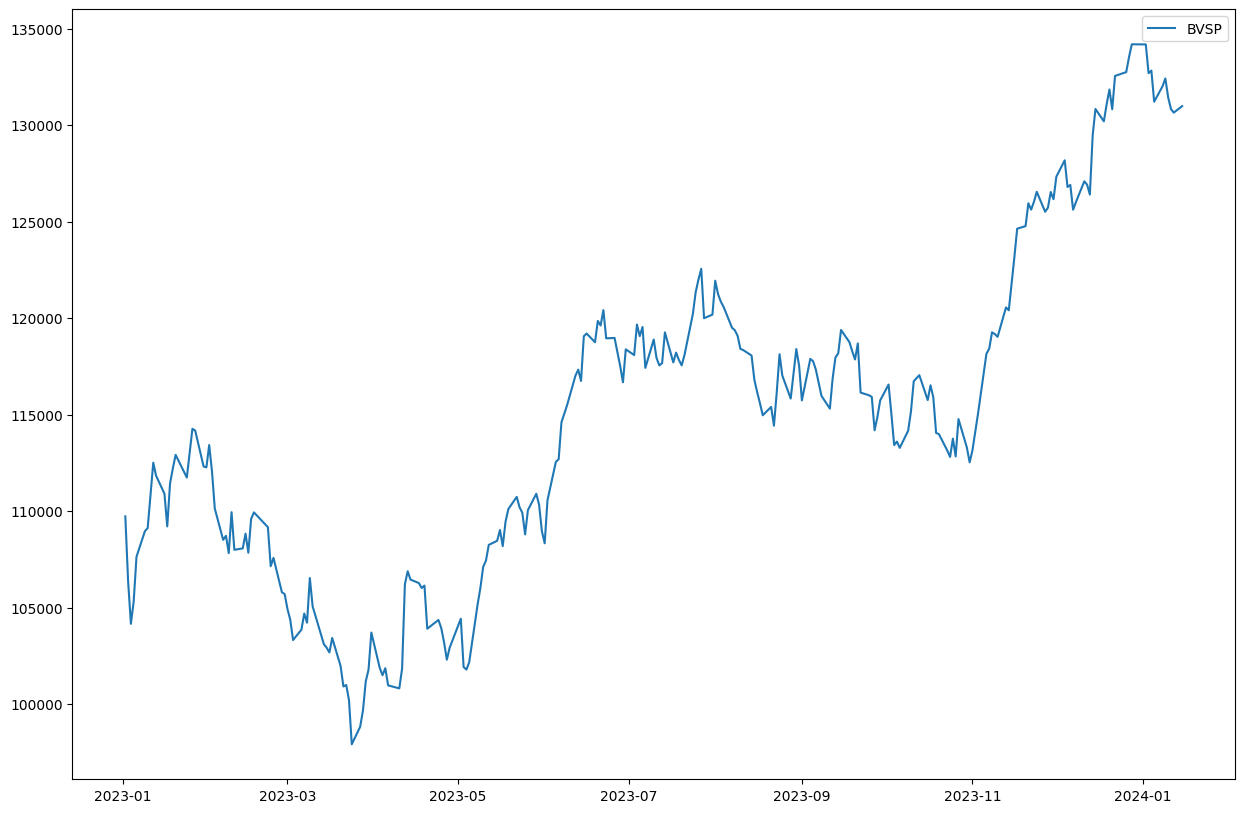

In [36]:
# Relação Date x Open (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]


plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Open'], label='BVSP')

plt.legend(loc='best')
plt.show()

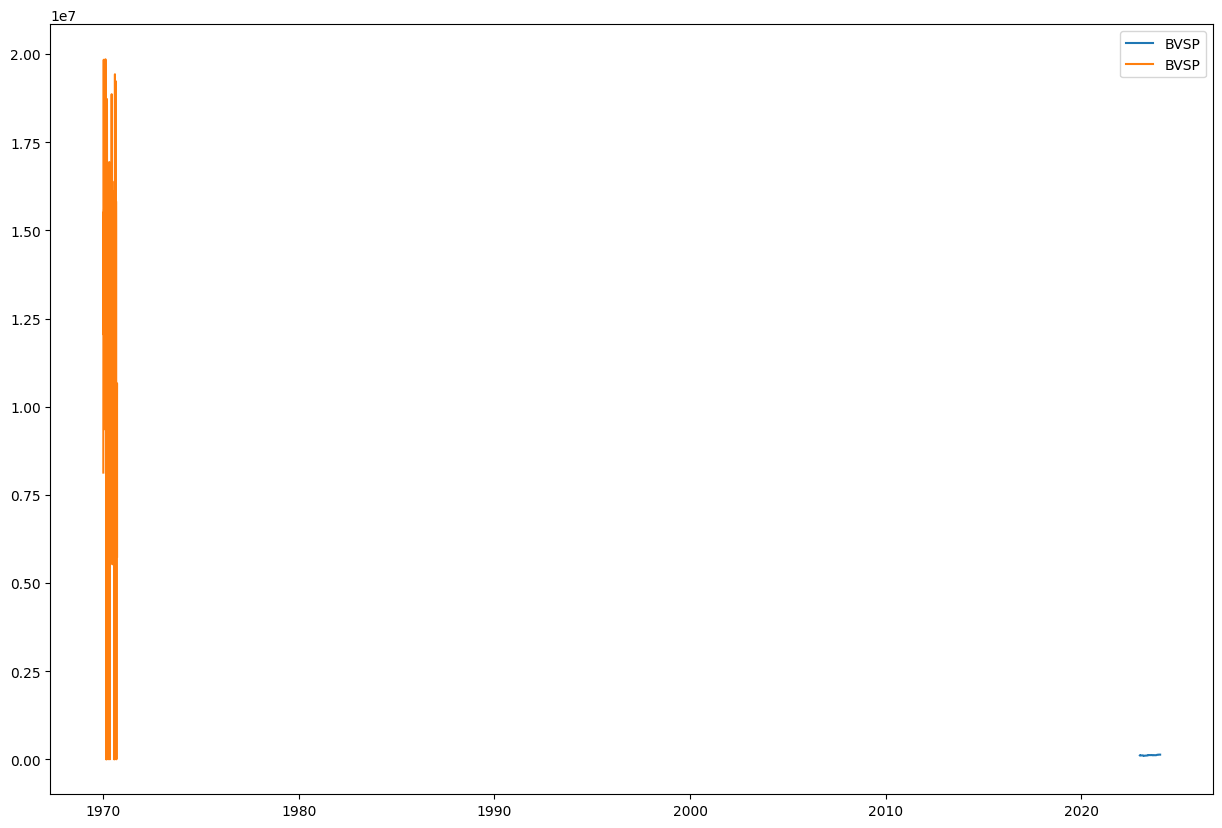

In [37]:
# Relação Date x Close x Volume (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

plt.figure(figsize = (15,10))
plt.plot(df['Date'],df['Close'],df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()

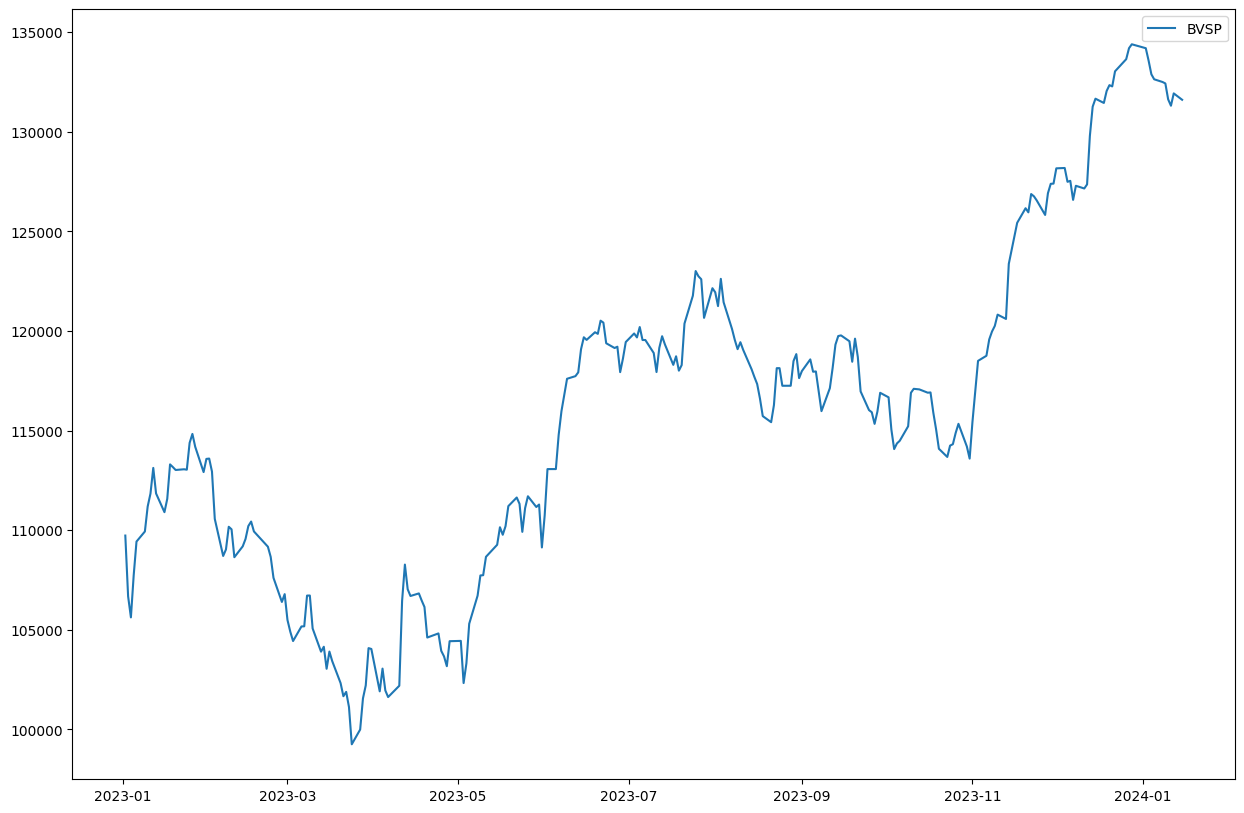

In [38]:
# Relação Date x High (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['High'], label='BVSP')

plt.legend(loc='best')
plt.show()

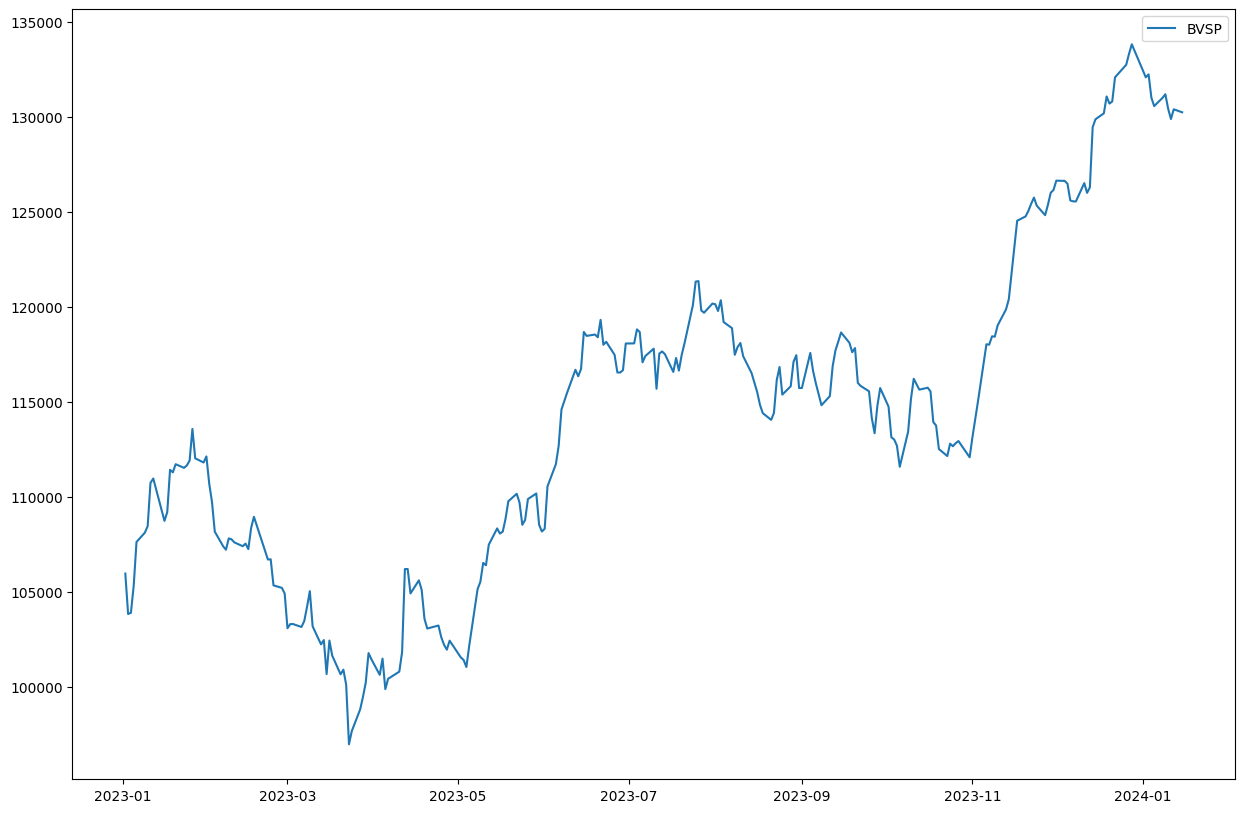

In [39]:
# Relação Date x Low (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Low'], label='BVSP')

plt.legend(loc='best')
plt.show()

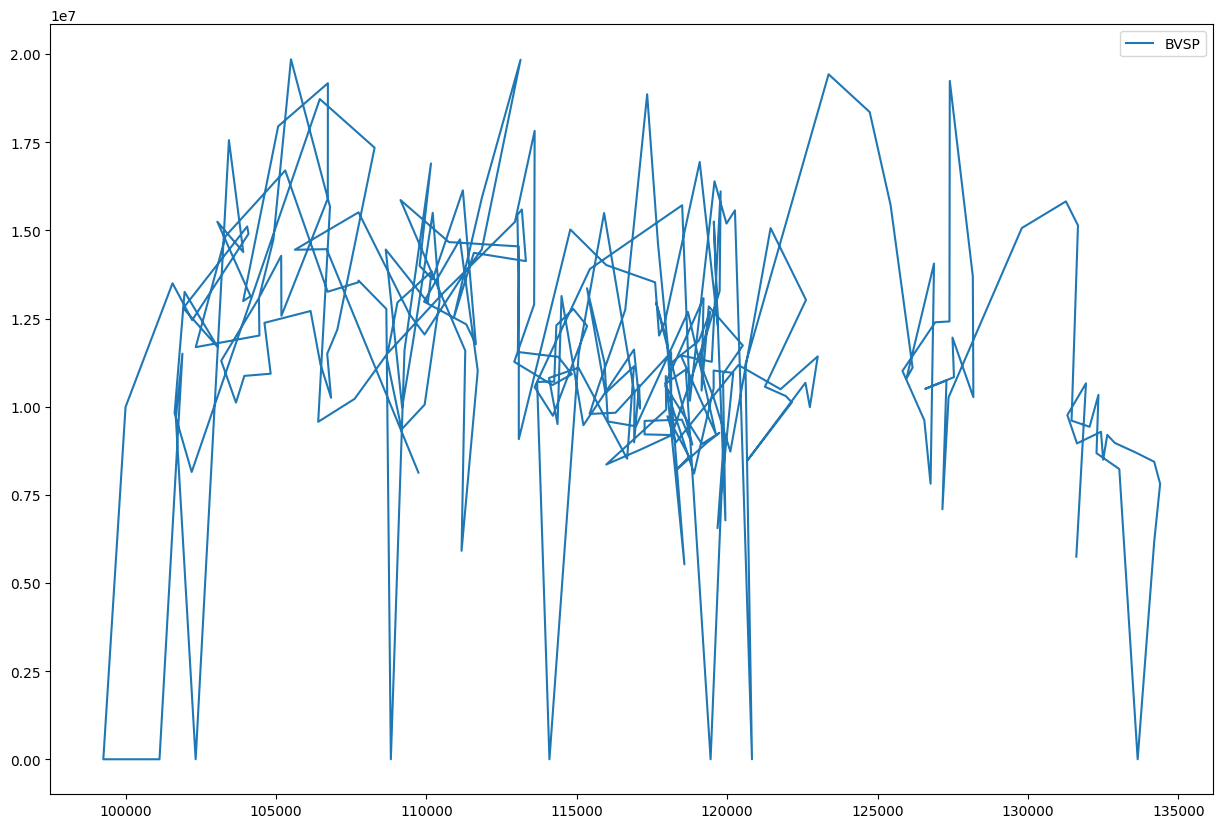

In [40]:
# Relação High x Volume (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

plt.figure(figsize = (15,10))
plt.plot(df['High'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()


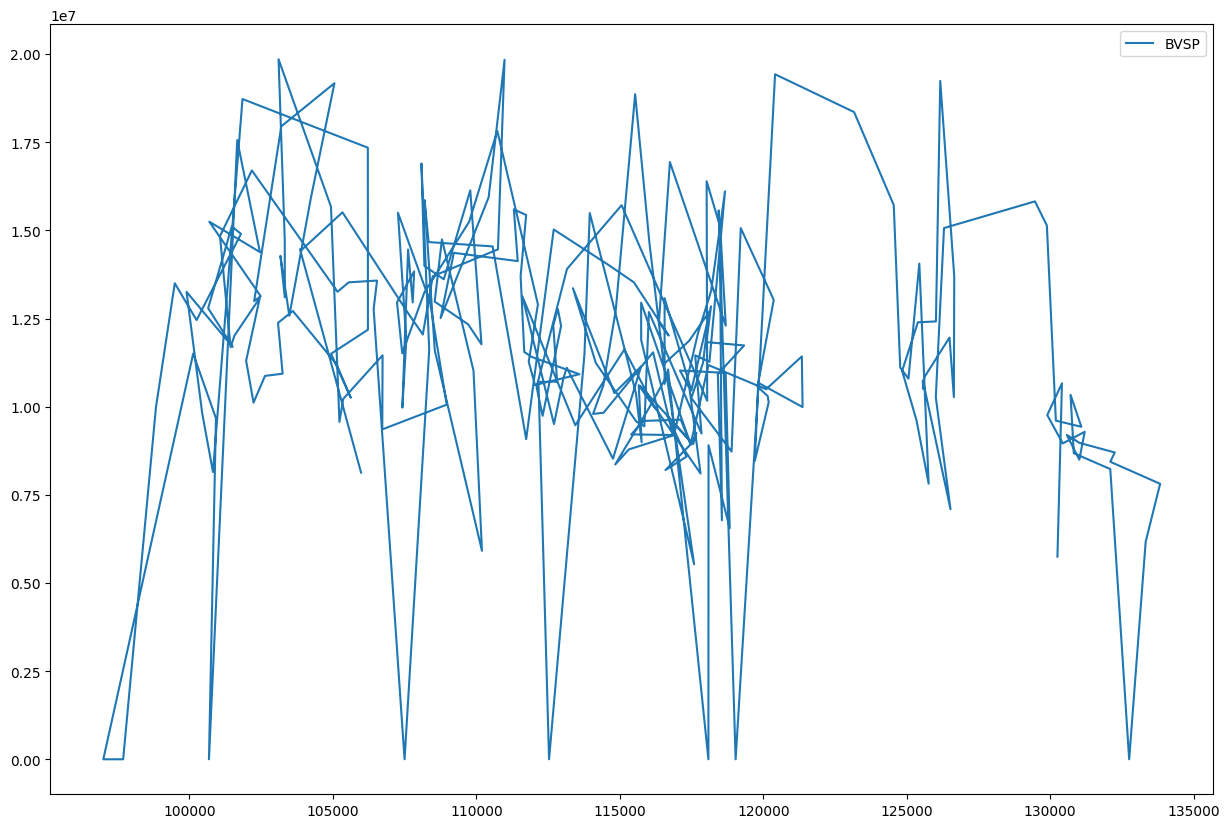

In [42]:
# Relação Low x Volume (selecionar um período)

# Filtrando por datas desejadas
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

plt.figure(figsize = (15,10))
plt.plot(df['Low'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()